In [372]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

## Leaky

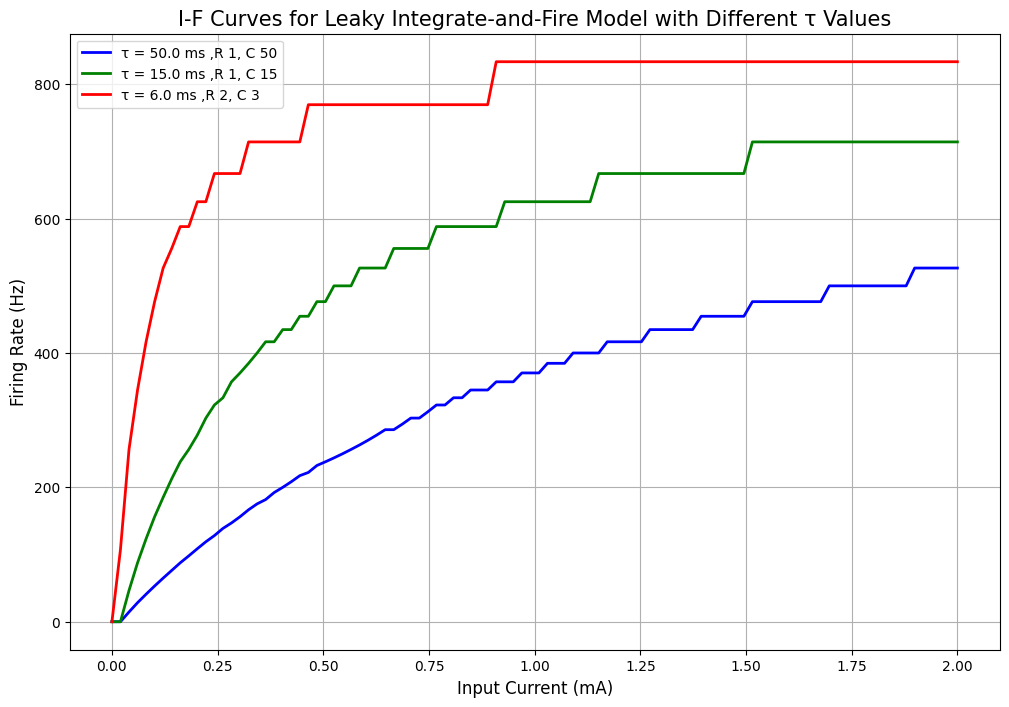

In [215]:
def simulate_LIF(I, T=500, dt=0.1, Rm=1, Cm=5):
    # Model Parameters:
    t_init  = 0     # Stimulus init time       [V]
    vRest   = -70   # Resting potential        [mV]
    tau_ref = 1     # Refractory Period        [mSec]
    vTh     = -40   # Spike threshold          [mV]
    vSpike  = 50    # Spike voltage            [mV]
    
    # Simulation parameters:
    time    = np.arange(0, T*1e-3 + dt*1e-3, dt*1e-3)  # Time array
    Vm      = np.ones(len(time))*vRest*1e-3            # Membrane voltage array
    tau_m   = Rm*1e3 * Cm*1e-6                         # Time constant 
    spikes  = []                                       # Spikes timings
    
    # Simulating:
    for i, t in enumerate(time[:-1]):
        if t > t_init:
            uinf = vRest*1e-3 + Rm*1e3 * I*1e-3
            Vm[i+1] = uinf + (Vm[i]-uinf)*np.exp(-dt*1e-3/tau_m)
            if Vm[i] >= vTh*1e-3:
                spikes.append(t*1e3) 
                Vm[i]=vSpike*1e-3
                t_init = t + tau_ref*1e-3
    
    # Calculate firing rate
    if len(spikes) > 1:
        firing_rate = 1000 / np.mean(np.diff(spikes))  # in Hz
    else:
        firing_rate = 0
    
    return firing_rate

# Calculate I-F curves for different tau values


current_range = np.linspace(0, 2, 100)  # Range of input currents from 0 to 2 mA
tau_values = [5e-3, 10e-3, 15e-3]  # Different tau values in seconds
colors = ['b', 'g', 'r']  # Colors for different curves


RM_vals = [1,1,2]
CM_vals = [50,15,3]

plt.figure(figsize=(12, 8))

for rm,cm , color in zip(RM_vals,CM_vals, colors):
    Rm = rm  # Fixed Rm value (kOhm)
    # Cm = tau / (Rm * 1e-3)  # Calculate Cm to achieve desired tau
    Cm = cm 
    tau = rm*cm
    firing_rates = []
    for I in current_range:
        rate = simulate_LIF(I, Rm=Rm, Cm=Cm)
        firing_rates.append(rate)
    
    plt.plot(current_range, firing_rates, color=color, linewidth=2, label=f'τ = {tau:.1f} ms ,R {rm}, C {cm}')

plt.title('I-F Curves for Leaky Integrate-and-Fire Model with Different τ Values', fontsize=15)
plt.xlabel('Input Current (mA)', fontsize=12)
plt.ylabel('Firing Rate (Hz)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

### Question 2



#### Threshold -40

/var/folders/30/l2rbr7r51tq0yg3k_wlhsny80000gn/T/ipykernel_6484/1148281641.py:18: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  stim = I*1e-3 * signal.triang(len(time)) # Triangular stimulation pattern


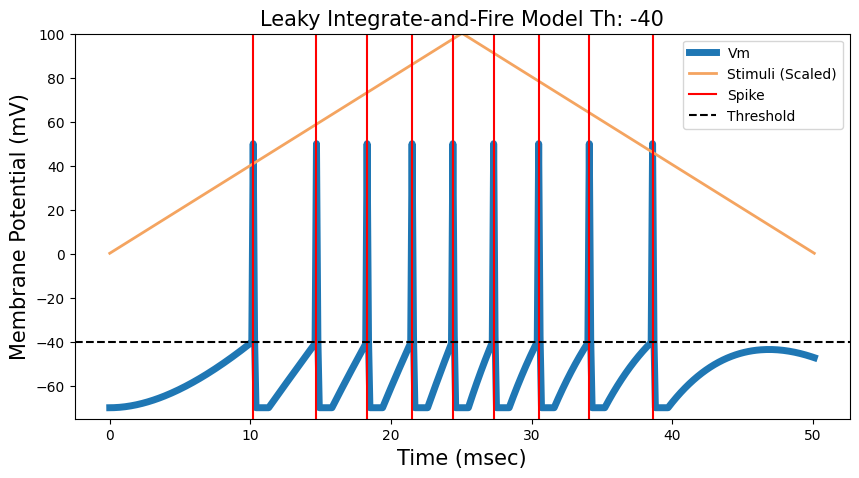

In [240]:
#Model Parameters:
T       = 50    # Simulation time          [mSec]
dt      = 0.1   # Simulation time interval [mSec]
t_init  = 0     # Stimulus init time       [V]
vRest   = -70   # Resting potential        [mV]
Rm      = 1     # Membrane Resistance      [kOhm]
Cm      = 5     # Capacitance              [uF]
tau_ref = 1     # Repreactory Period       [mSec]
vTh     = -40   # Spike threshond          [mV]
I       = 0.2   # Current stimulus         [mA]
vSpike  = 50    # Spike voltage            [mV]
#Simulation parameters:
time    = np.arange(0, T*1e-3 + dt*1e-3, dt*1e-3)  # Time array
Vm      = np.ones(len(time))*vRest*1e-3            # Membrane voltage array
tau_m   = 0.01#Rm*1e3 * Cm*1e-6                         # Time constant 
spikes  = []                                       # Spikes timings
#Defining the stimulus:
stim = I*1e-3 * signal.triang(len(time)) # Triangular stimulation pattern
#Simulating:
for i, t in enumerate(time[:-1]):
    if t > t_init:
        uinf = vRest*1e-3 + Rm*1e3 * stim[i]
        Vm[i+1] = uinf + (Vm[i]-uinf)*np.exp(-dt*1e-3/tau_m)
        if Vm[i] >= vTh*1e-3:
            spikes.append(t*1e3) 
            Vm[i]=vSpike*1e-3
            t_init = t + tau_ref*1e-3
#Plot 
plt.figure(figsize=(10,5))
plt.title('Leaky Integrate-and-Fire Model Th: -40', fontsize=15) 
plt.ylabel('Membrane Potential (mV)', fontsize=15) 
plt.xlabel('Time (msec)', fontsize=15)
plt.plot(time*1e3, Vm*1e3, linewidth=5, label = 'Vm')
plt.plot(time*1e3, 100/max(stim)*stim, label = 'Stimuli (Scaled)', color='sandybrown', linewidth=2)
plt.ylim([-75,100])
plt.axvline(x=spikes[0], c='red', label = 'Spike')
for s in spikes[1:]:
    plt.axvline(x=s, c='red')
plt.axhline(y=vTh, c='black', label = 'Threshold', linestyle='--')
plt.legend()

#### Threshold -50

/var/folders/30/l2rbr7r51tq0yg3k_wlhsny80000gn/T/ipykernel_6484/3158112456.py:18: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  stim = I*1e-3 * signal.triang(len(time)) # Triangular stimulation pattern


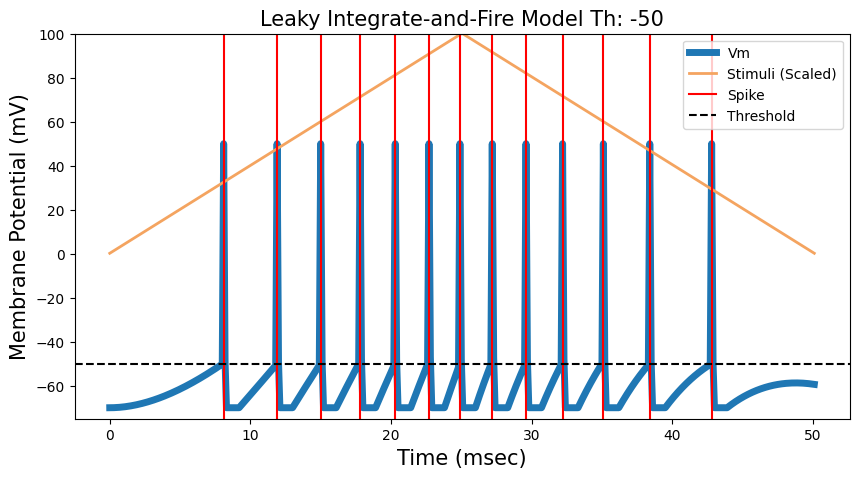

In [250]:
#Model Parameters:
T       = 50    # Simulation time          [mSec]
dt      = 0.1   # Simulation time interval [mSec]
t_init  = 0     # Stimulus init time       [V]
vRest   = -70   # Resting potential        [mV]
Rm      = 1     # Membrane Resistance      [kOhm]
Cm      = 5     # Capacitance              [uF]
tau_ref = 1     # Repreactory Period       [mSec]
vTh     = -50   # Spike threshond          [mV]
I       = 0.2   # Current stimulus         [mA]
vSpike  = 50    # Spike voltage            [mV]
#Simulation parameters:
time    = np.arange(0, T*1e-3 + dt*1e-3, dt*1e-3)  # Time array
Vm      = np.ones(len(time))*vRest*1e-3            # Membrane voltage array
tau_m   = 0.01 #Rm*1e3 * Cm*1e-6                         # Time constant 
spikes  = []                                       # Spikes timings
#Defining the stimulus:
stim = I*1e-3 * signal.triang(len(time)) # Triangular stimulation pattern
#Simulating:
for i, t in enumerate(time[:-1]):
    if t > t_init:
        uinf = vRest*1e-3 + Rm*1e3 * stim[i]
        Vm[i+1] = uinf + (Vm[i]-uinf)*np.exp(-dt*1e-3/tau_m)
        if Vm[i] >= vTh*1e-3:
            spikes.append(t*1e3) 
            Vm[i]=vSpike*1e-3
            t_init = t + tau_ref*1e-3
#Plot 
plt.figure(figsize=(10,5))
plt.title('Leaky Integrate-and-Fire Model Th: -50', fontsize=15) 
plt.ylabel('Membrane Potential (mV)', fontsize=15) 
plt.xlabel('Time (msec)', fontsize=15)
plt.plot(time*1e3, Vm*1e3, linewidth=5, label = 'Vm')
plt.plot(time*1e3, 100/max(stim)*stim, label = 'Stimuli (Scaled)', color='sandybrown', linewidth=2)
plt.ylim([-75,100])
plt.axvline(x=spikes[0], c='red', label = 'Spike')
for s in spikes[1:]:
    plt.axvline(x=s, c='red')
plt.axhline(y=vTh, c='black', label = 'Threshold', linestyle='--')
plt.legend()

In [251]:
spikes

[8.1,
 11.9,
 15.000000000000002,
 17.8,
 20.3,
 22.700000000000003,
 24.900000000000002,
 27.200000000000003,
 29.6,
 32.2,
 35.1,
 38.400000000000006,
 42.800000000000004]

In [ ]:
#### Threshold -30

/var/folders/30/l2rbr7r51tq0yg3k_wlhsny80000gn/T/ipykernel_6484/4113783619.py:18: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  stim = I*1e-3 * signal.triang(len(time)) # Triangular stimulation pattern


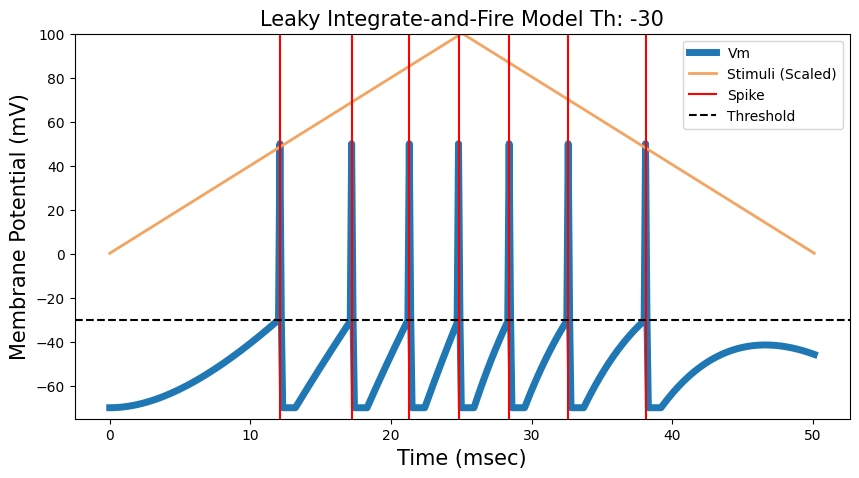

In [242]:
#Model Parameters:
T       = 50    # Simulation time          [mSec]
dt      = 0.1   # Simulation time interval [mSec]
t_init  = 0     # Stimulus init time       [V]
vRest   = -70   # Resting potential        [mV]
Rm      = 1     # Membrane Resistance      [kOhm]
Cm      = 5     # Capacitance              [uF]
tau_ref = 1     # Repreactory Period       [mSec]
vTh     = -30   # Spike threshond          [mV]
I       = 0.2   # Current stimulus         [mA]
vSpike  = 50    # Spike voltage            [mV]
#Simulation parameters:
time    = np.arange(0, T*1e-3 + dt*1e-3, dt*1e-3)  # Time array
Vm      = np.ones(len(time))*vRest*1e-3            # Membrane voltage array
tau_m   = 0.01 #Rm*1e3 * Cm*1e-6                         # Time constant 
spikes  = []                                       # Spikes timings
#Defining the stimulus:
stim = I*1e-3 * signal.triang(len(time)) # Triangular stimulation pattern
#Simulating:
for i, t in enumerate(time[:-1]):
    if t > t_init:
        uinf = vRest*1e-3 + Rm*1e3 * stim[i]
        Vm[i+1] = uinf + (Vm[i]-uinf)*np.exp(-dt*1e-3/tau_m)
        if Vm[i] >= vTh*1e-3:
            spikes.append(t*1e3) 
            Vm[i]=vSpike*1e-3
            t_init = t + tau_ref*1e-3
#Plot 
plt.figure(figsize=(10,5))
plt.title('Leaky Integrate-and-Fire Model Th: -30', fontsize=15) 
plt.ylabel('Membrane Potential (mV)', fontsize=15) 
plt.xlabel('Time (msec)', fontsize=15)
plt.plot(time*1e3, Vm*1e3, linewidth=5, label = 'Vm')
plt.plot(time*1e3, 100/max(stim)*stim, label = 'Stimuli (Scaled)', color='sandybrown', linewidth=2)
plt.ylim([-75,100])
plt.axvline(x=spikes[0], c='red', label = 'Spike')
for s in spikes[1:]:
    plt.axvline(x=s, c='red')
plt.axhline(y=vTh, c='black', label = 'Threshold', linestyle='--')
plt.legend()

## Izhikevich

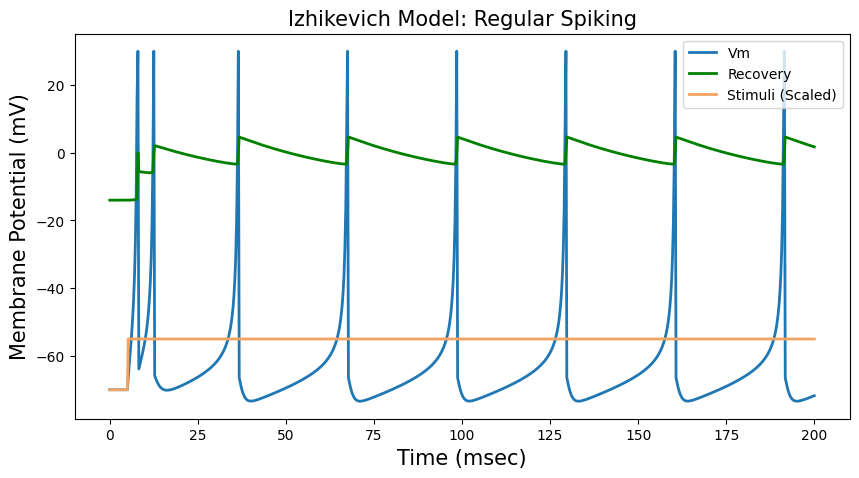

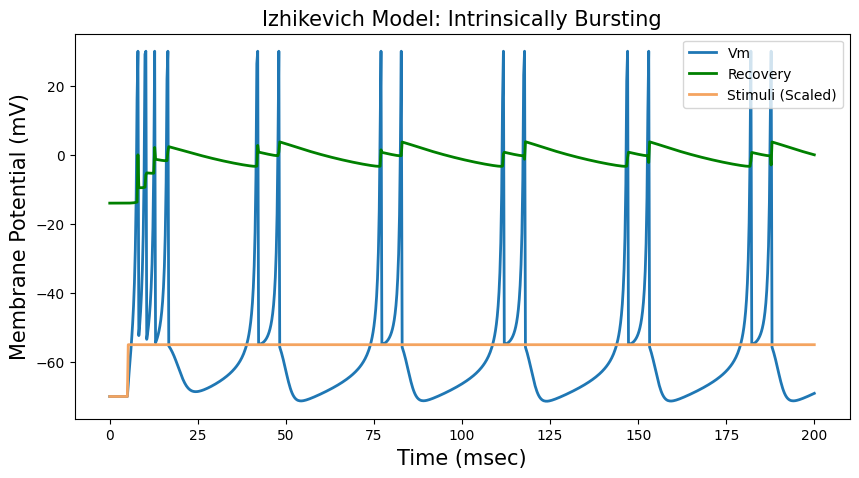

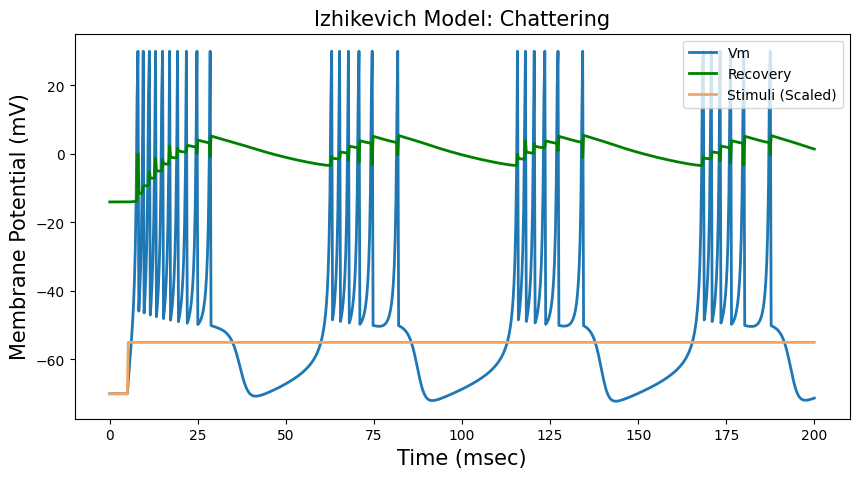

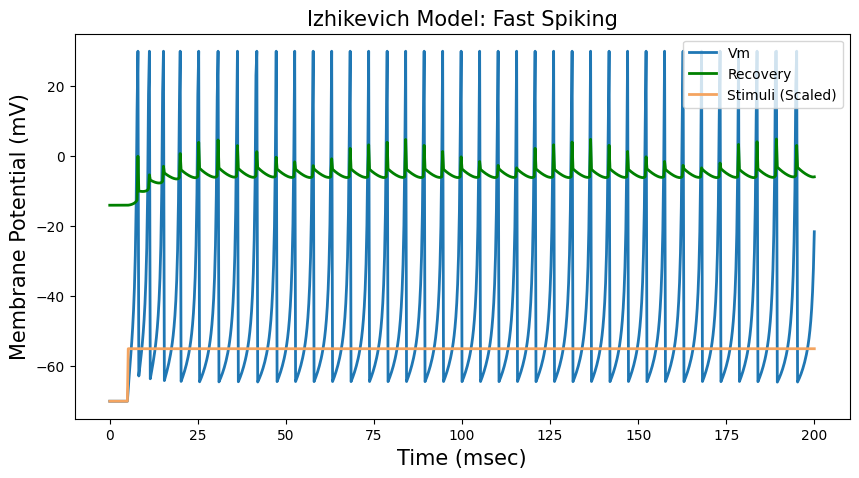

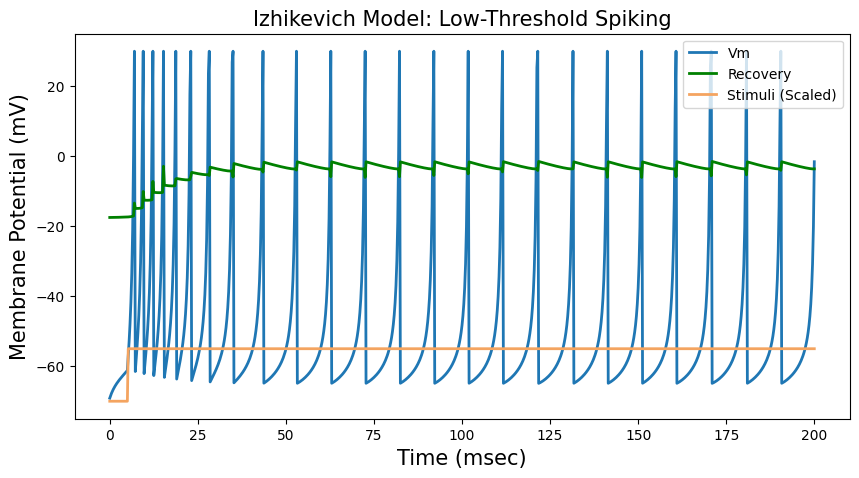

In [368]:

x = 5
y = 140

# Updated titles and parameters for 8 models
titles = [
    'Regular Spiking', 'Intrinsically Bursting', 'Chattering', 
    'Fast Spiking', 'Low-Threshold Spiking'
]


a = [0.02, 0.02, 0.02, 0.1, 0.02]
b = [0.2, 0.2, 0.2, 0.2, 0.25]
c = [-65, -55, -50, -65, -65]
d = [8, 4, 2, 2, 2,]

v0 = -70  # Resting potential [mV]
T = 200   # Simulation time [mSec]
dt = 0.25  # Simulation time interval [mSec]

time = np.arange(0, T + dt, dt)  # Time array

# Stimulus
stim = np.zeros(len(time))
for i in range(len(stim)):
    if i > 20:
        stim[i] = 15

# Trace variables to hold v and u
trace = np.zeros((2, len(time)))

# Loop through all models
for exp in range(len(a)):
    v = v0
    u = b[exp] * v
    spikes = []

    # Simulate the neuron dynamics
    for i, stim_value in enumerate(stim):
        v += dt * (0.04 * v**2 + x * v + y - u + stim[i])
        u += dt * a[exp] * (b[exp] * v - u)
        if v > 30:
            trace[0, i] = 30  # Spike peak
            v = c[exp]  # Voltage reset
            u += d[exp]
        else:
            trace[0, i] = v
            trace[1, i] = u

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.title(f'Izhikevich Model: {titles[exp]}', fontsize=15)
    plt.ylabel('Membrane Potential (mV)', fontsize=15)
    plt.xlabel('Time (msec)', fontsize=15)
    plt.plot(time, trace[0], linewidth=2, label='Vm')
    plt.plot(time, trace[1], linewidth=2, label='Recovery', color='green')
    plt.plot(time, stim + v0, label='Stimuli (Scaled)', color='sandybrown', linewidth=2)
    plt.legend(loc=1)
    plt.show()


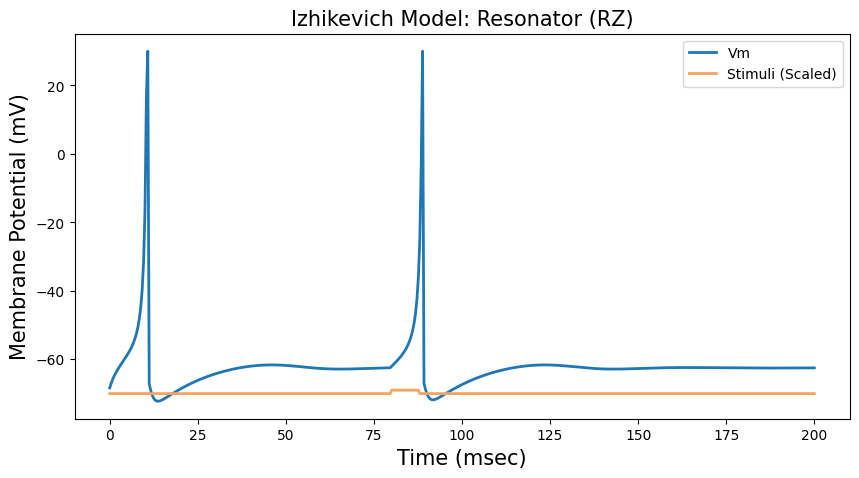

In [370]:

# Parameters for the Resonator (RZ) model
a = 0.1
b = 0.26
c = -65
d = 2
v0 = -70  # Resting potential [mV]
T = 200   # Simulation time [mSec]
dt = 0.4  # Simulation time interval [mSec]


time = np.arange(0, T + dt, dt)  # Time array

# Stimulus
stim = np.zeros(len(time))
for i in range(len(stim)):
    if 200 <= i < 220:
        stim[i] = 1

# Trace variables to hold v and u
v = v0
u = b * v
trace_v = []
trace_u = []

# Simulate the neuron dynamics
for i, stim_value in enumerate(stim):
    v += dt * (0.04 * v**2 + 5 * v + 140 - u + stim_value)
    u += dt * a * (b * v - u)
    if v >= 30:
        trace_v.append(30)  # Spike peak
        v = c  # Voltage reset
        u += d
    else:
        trace_v.append(v)
    trace_u.append(u)

# Plot the results
plt.figure(figsize=(10, 5))
plt.title('Izhikevich Model: Resonator (RZ)', fontsize=15)
plt.ylabel('Membrane Potential (mV)', fontsize=15)
plt.xlabel('Time (msec)', fontsize=15)
plt.plot(time, trace_v, linewidth=2, label='Vm')
plt.plot(time, stim + v0, label='Stimuli (Scaled)', color='sandybrown', linewidth=2)
plt.legend(loc=1)
plt.show()


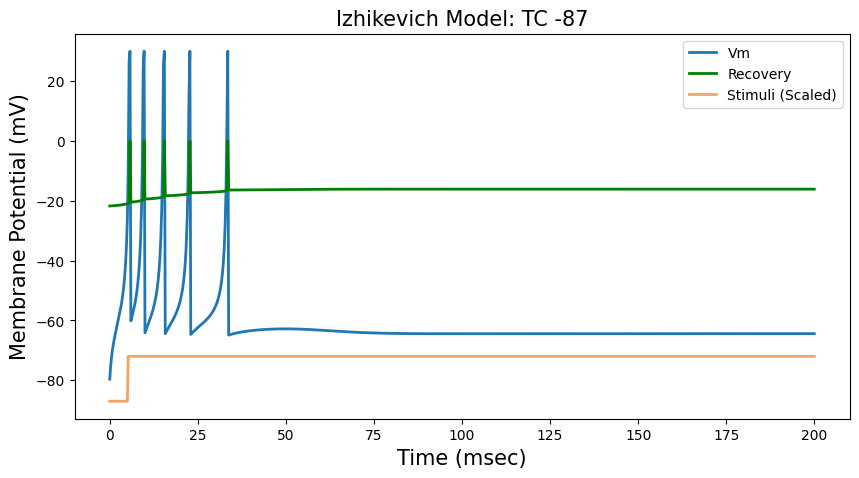

In [371]:

x = 5
y = 140

# Updated titles and parameters for 8 models
titles = [
   'TC -87'
]


a = [0.02]
b = [0.25]
c = [-65]
d = [0.05]

v0 = -87  # Resting potential [mV]
T = 200   # Simulation time [mSec]
dt = 0.25  # Simulation time interval [mSec]

time = np.arange(0, T + dt, dt)  # Time array
stim_val = 15
# Stimulus
stim = np.zeros(len(time))
stim_val = np.zeros(len(time)) 

for i in range(len(stim)):
    if  20 <i < 25:
        stim[i] = 15
    if  20< i:
        stim_val[i]=15

# Trace variables to hold v and u
trace = np.zeros((2, len(time)))

# Loop through all models
for exp in range(len(a)):
    v = v0
    u = b[exp] * v
    spikes = []
    
    # Simulate the neuron dynamics
    for i, stim_value in enumerate(stim):
        v += dt * (0.04 * v**2 + x * v + y - u + stim[i])
        u += dt * a[exp] * (b[exp] * v - u)
        if v > 30:
            trace[0, i] = 30  # Spike peak
            v = c[exp]  # Voltage reset
            u += d[exp]
        else:
            trace[0, i] = v
            trace[1, i] = u

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.title(f'Izhikevich Model: {titles[exp]}', fontsize=15)
    plt.ylabel('Membrane Potential (mV)', fontsize=15)
    plt.xlabel('Time (msec)', fontsize=15)
    plt.plot(time, trace[0], linewidth=2, label='Vm')
    plt.plot(time, trace[1], linewidth=2, label='Recovery', color='green')
    plt.plot(time, v0 + stim_val, label='Stimuli (Scaled)', color='sandybrown', linewidth=2)
    plt.legend(loc=1)
    plt.show()


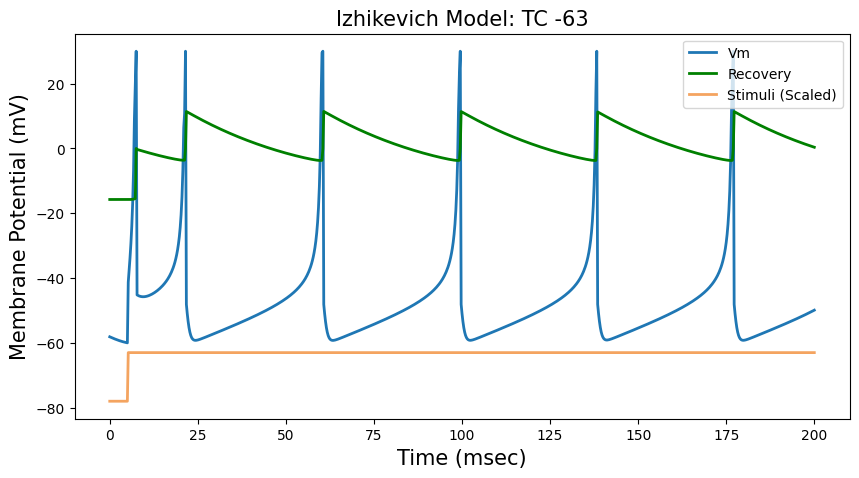

In [366]:
import numpy as np
import matplotlib.pyplot as plt

x = 5
y = 140

# Updated titles and parameters for 8 models
titles = [
   'TC -63'
]

a = [0.02]
b = [0.25]
c = [-65]
d = [0.05]

v0 = -63  # Resting potential [mV]
T = 200   # Simulation time [mSec]
dt = 0.25  # Simulation time interval [mSec]

time = np.arange(0, T + dt, dt)  # Time array
stim_val = 15
# Stimulus
stim = np.zeros(len(time))

for i in range(len(stim)):
    # if i > 0 :
    #     stim[i] =15
    if  i > 20:
        stim[i] =15

# Trace variables to hold v and u
trace = np.zeros((2, len(time)))

# Loop through all models
for exp in range(len(a)):
    v = v0
    u = b[exp] * v
    spikes = []
    
    # Simulate the neuron dynamics
    for i, stim_value in enumerate(stim):
        v += dt * (0.04 * v**2 + x * v + y - u + stim[i])
        u += dt * a[exp] * (b[exp] * v - u)
        if v > 30:
            trace[0, i] = 30  # Spike peak
            v = c[exp]  # Voltage reset +stim[i]
            u += d[exp] +stim[i]
        elif v> 10:
            trace[0, i] = v 
            trace[1, i] = u 

        else:
            trace[0, i] = v + x +stim[i]
            trace[1, i] = u 

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.title(f'Izhikevich Model: {titles[exp]}', fontsize=15)
    plt.ylabel('Membrane Potential (mV)', fontsize=15)
    plt.xlabel('Time (msec)', fontsize=15)
    plt.plot(time, trace[0], linewidth=2, label='Vm')
    plt.plot(time, trace[1], linewidth=2, label='Recovery', color='green')
    plt.plot(time, stim + v0 - stim_val, label='Stimuli (Scaled)', color='sandybrown', linewidth=2)
    plt.legend(loc=1)
    plt.show()


## Hodgkin-Huxley

In [406]:
class HHModel:

    class Gate:
        alpha, beta, state = 0, 0, 0

        def update(self, deltaTms):
            alphaState = self.alpha * (1-self.state)
            betaState = self.beta * self.state
            self.state += deltaTms * (alphaState - betaState)

        def setInfiniteState(self):
            self.state = self.alpha / (self.alpha + self.beta)

    ENa, EK, EKleak = 115, -12, 10.6
    gNa, gK, gKleak = 120, 36, 0.3
    m, n, h = Gate(), Gate(), Gate()
    Cm = 1

    def __init__(self, startingVoltage=0):
        self.Vm = startingVoltage
        self.UpdateGateTimeConstants(startingVoltage)
        self.m.setInfiniteState()
        self.n.setInfiniteState()
        self.h.setInfiniteState()
        self.INa = 0
        self.IK  = 0
        self.IKleak = 0
        self.Isum = 0

    def setE(self,ena,ek,ekleak):
        self.ENa, self.EK, self.EKleak = ena, ek, ekleak

    def setG(self,gna,gk,gkleak):
        self.gNa, self.gK, self.gKleak = gna, gk, gkleak

    

    def UpdateGateTimeConstants(self, Vm):
        self.n.alpha = .01 * ((10-Vm) / (np.exp((10-Vm)/10)-1))
        self.n.beta = .125*np.exp(-Vm/80)
        self.m.alpha = .1*((25-Vm) / (np.exp((25-Vm)/10)-1))
        self.m.beta = 4*np.exp(-Vm/18)
        self.h.alpha = .07*np.exp(-Vm/20)
        self.h.beta = 1/(np.exp((30-Vm)/10)+1)

    def UpdateCellVoltage(self, stimulusCurrent, deltaTms):
        self.INa = np.power(self.m.state, 3) * self.gNa * \
                   self.h.state*(self.Vm-self.ENa)
        self.IK = np.power(self.n.state, 4) * self.gK * (self.Vm-self.EK)
        self.IKleak = self.gKleak * (self.Vm-self.EKleak)
        self.Isum = stimulusCurrent - self.INa - self.IK - self.IKleak
        self.Vm += deltaTms * self.Isum / self.Cm

    def UpdateGateStates(self, deltaTms):
        self.n.update(deltaTms)
        self.m.update(deltaTms)
        self.h.update(deltaTms)

    def Iterate(self, stimulusCurrent=0, deltaTms=0.05):
        self.UpdateGateTimeConstants(self.Vm)
        self.UpdateCellVoltage(stimulusCurrent, deltaTms)
        self.UpdateGateStates(deltaTms)

In [444]:
def plot_expirements(ena=115,ek=-12,ekleak= 10.6,gna=120,gk=36,gkleak=0.3):
    hh = HHModel()
    hh.setE(ena,ek,ekleak)
    hh.setG(gna,gk,gkleak)
    pointCount = 5000
    Vm = np.empty(pointCount)
    n = np.empty(pointCount)
    m = np.empty(pointCount)
    h = np.empty(pointCount)
    INa = np.empty(pointCount)
    IK = np.empty(pointCount)
    IKleak = np.empty(pointCount)
    Isum = np.empty(pointCount)
    times = np.arange(pointCount) * 0.05
    stim = np.zeros(pointCount)
    stim[2000:3000] = 10
    
    for i in range(len(times)):
        hh.Iterate(stimulusCurrent=stim[i], deltaTms=0.05)
        Vm[i] = hh.Vm
        n[i]  = hh.n.state
        m[i]  = hh.m.state
        h[i]  = hh.h.state
        INa[i] = hh.INa
        IK[i] = hh.IK
        IKleak[i] = hh.IKleak
        Isum[i] = hh.Isum


    plt.figure(figsize=(10,5))
    plt.plot(times, Vm - 70, linewidth=2, label='Vm')
    plt.plot(times, stim - 70, label = 'Stimuli (Scaled)', linewidth=2, color='sandybrown')
    plt.ylabel(f"Membrane Potential (mV)", fontsize=15)
    plt.xlabel('Time (msec)', fontsize=15)
    plt.xlim([90,160])
    plt.title(f"Hodgkin-Huxley Neuron Model  ENa: {ena}, Ek: {ek} Ekleak: {ekleak} GNa: {gna}, Gk {gk}, Gkleak: {gkleak}  ", fontsize=15)
    plt.legend(loc=1)
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(times, m, label='m (Na)', linewidth=2)
    plt.plot(times, h, label='h (Na)', linewidth=2)
    plt.plot(times, n, label='n (K)', linewidth=2)
    plt.ylabel("Gate state", fontsize=15)
    plt.xlabel('Time (msec)', fontsize=15)
    plt.xlim([90,160])
    plt.title(f"Hodgkin-Huxley Spiking Neuron Model: Gatings  ENa: {ena}, Ek: {ek} Ekleak: {ekleak} GNa: {gna}, Gk {gk}, Gkleak: {gkleak} ", fontsize=15)
    plt.legend(loc=1)
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(times, INa, label='INa', linewidth=2)
    plt.plot(times, IK, label='IK', linewidth=2)
    plt.plot(times, IKleak, label='Ileak', linewidth=2)
    plt.plot(times, Isum, label='Isum', linewidth=2)
    plt.ylabel("Current (uA)", fontsize=15)
    plt.xlabel('Time (msec)', fontsize=15)
    plt.title(f"Hodgkin-Huxley Spiking Neuron Model: Ion Currents  ENa: {ena}, Ek: {ek} Ekleak: {ekleak} GNa: {gna}, Gk {gk}, Gkleak: {gkleak} ", fontsize=15)
    plt.xlim([90,160])
    plt.legend(loc=1)
    plt.show()

### Part III
#### Question 2 

#### Setup 1 : ENa, EK, EKleak = 1, -12, 10.6

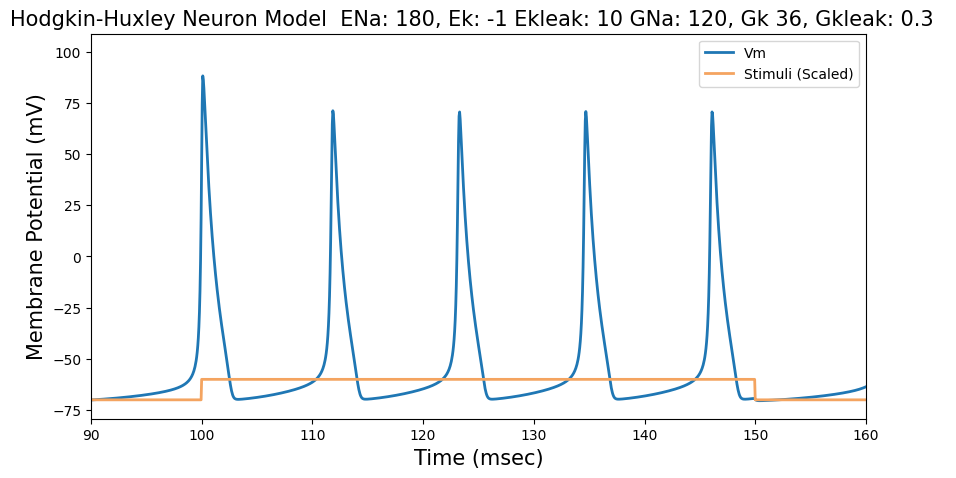

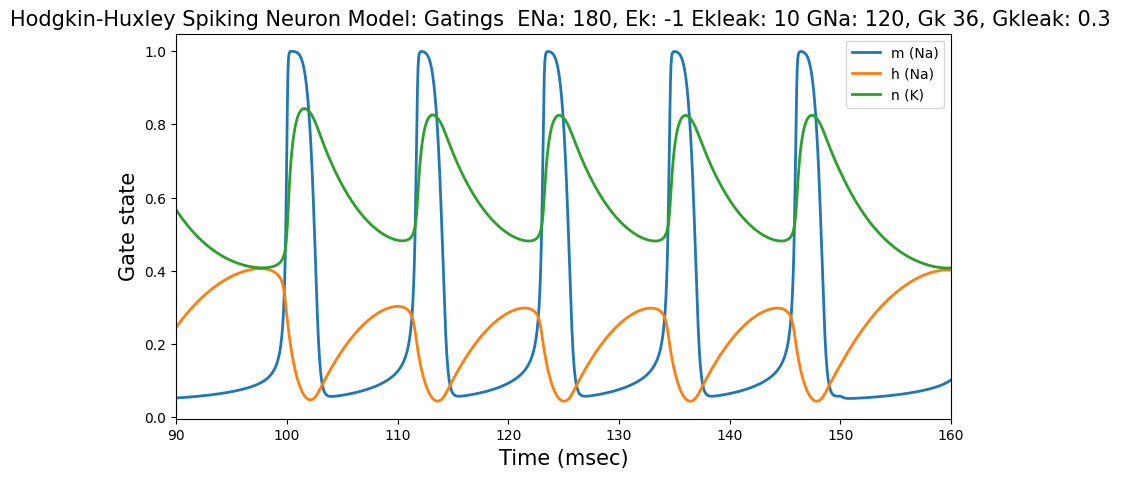

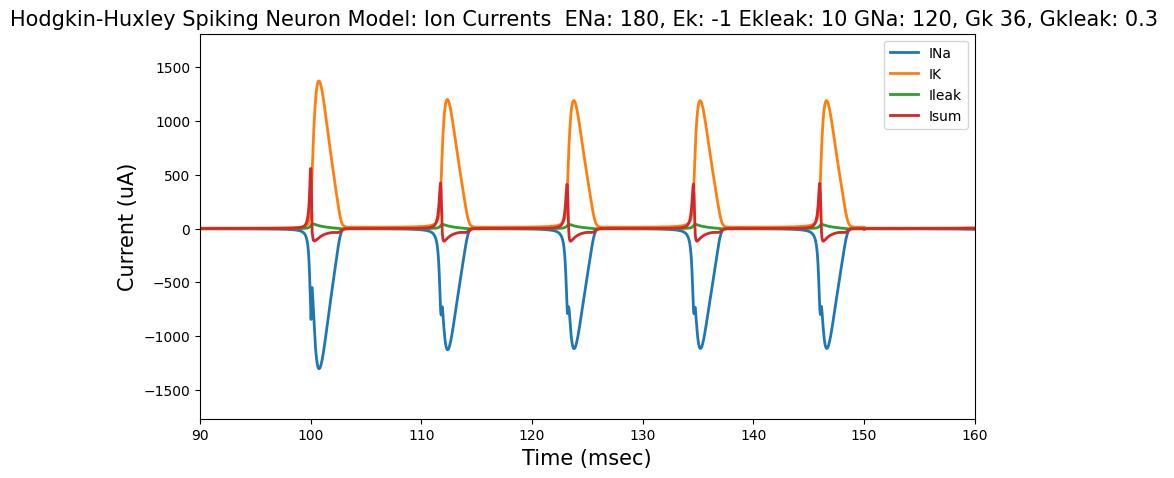

In [445]:
ENa, EK, EKleak = 180, -1, 10

plot_expirements(ena=ENa ,ek=EK,ekleak = EKleak)

#### Setup2  : ENa, EK, EKleak = 110, -21, 10

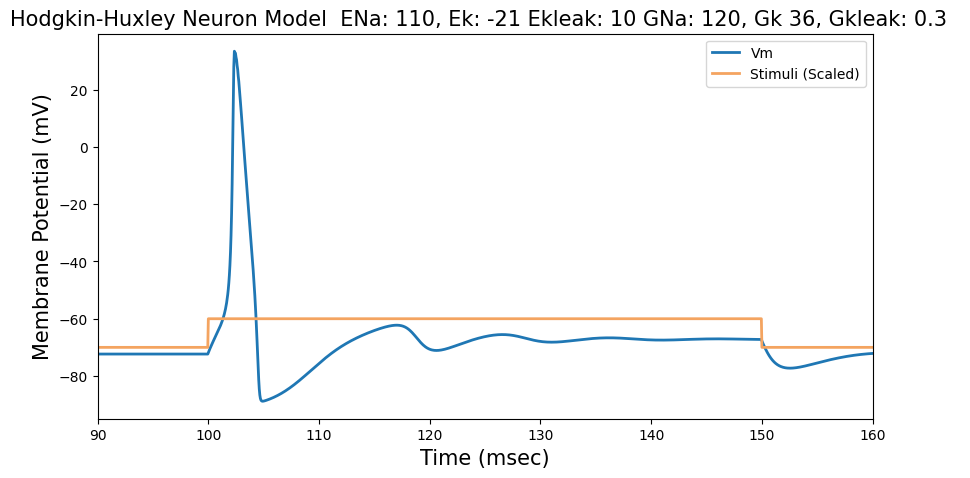

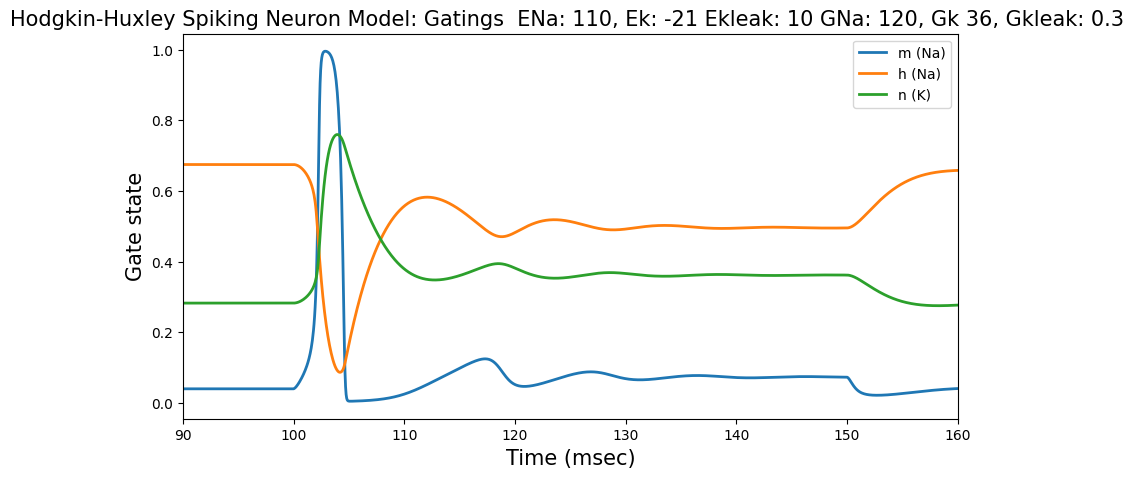

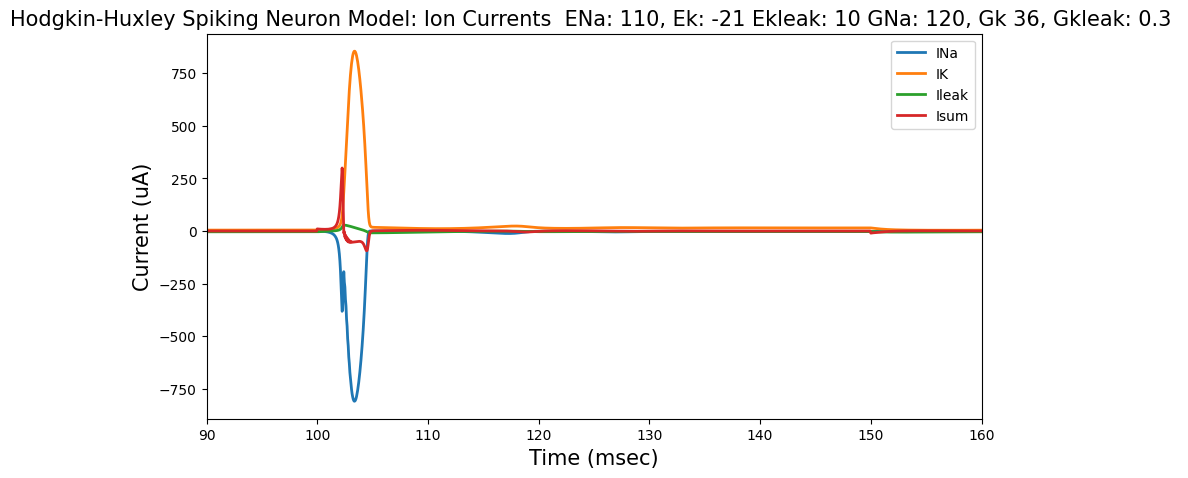

In [446]:
ENa, EK, EKleak = 110, -21, 10

plot_expirements(ena=ENa ,ek=EK,ekleak = EKleak)

#### Setup2  : ENa, EK, EKleak = 110, -11, 4

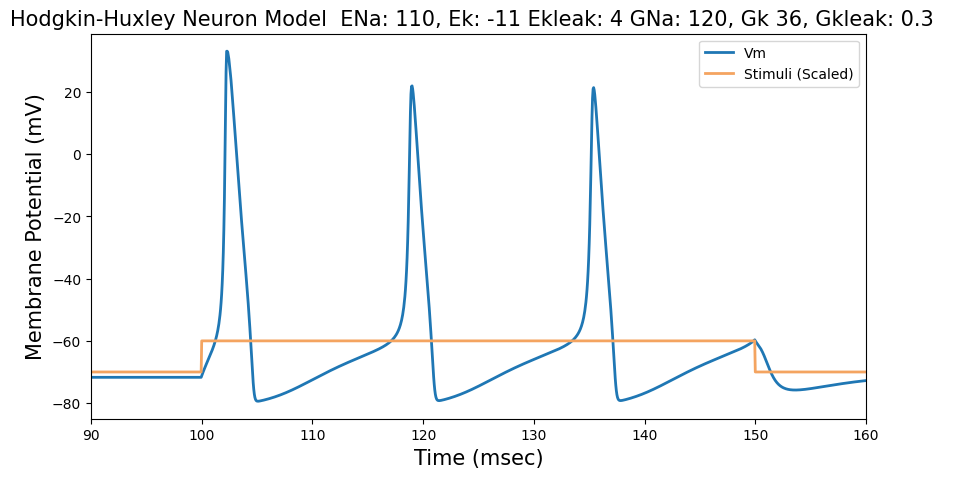

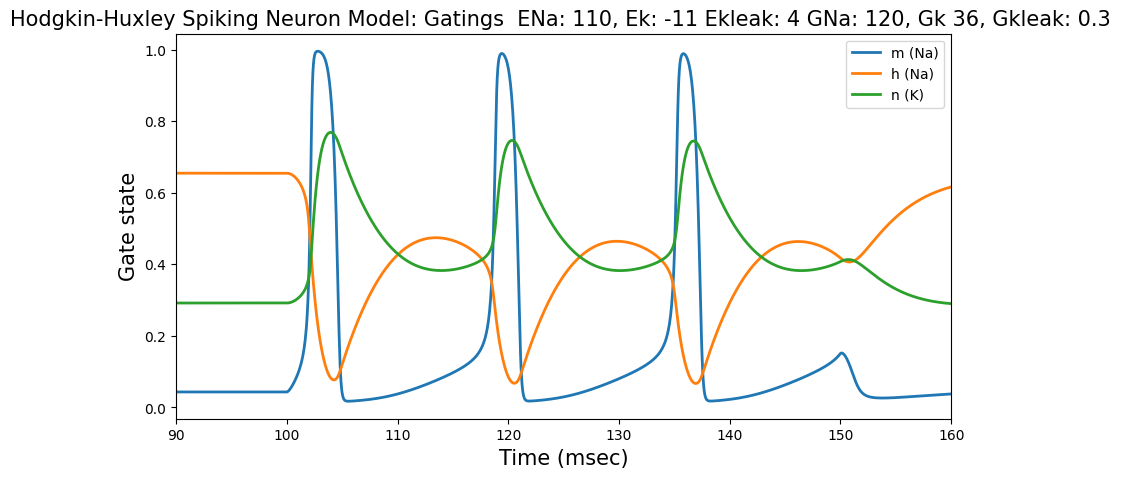

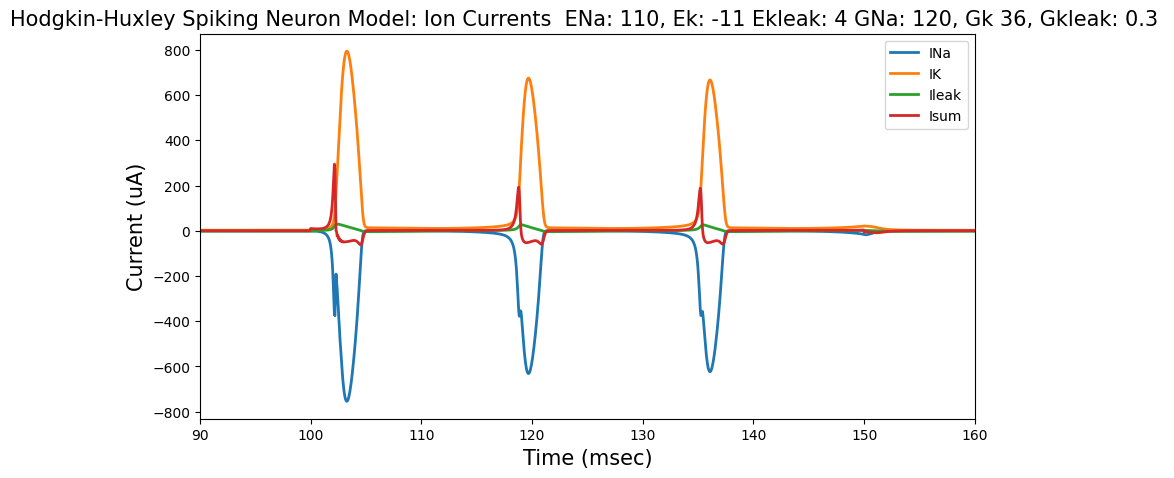

In [448]:
ENa, EK, EKleak = 110, -11, 4
plot_expirements(ena=ENa ,ek=EK,ekleak = EKleak)

### Part III
#### Question 4 

#### Setup1  : GNa, GK, GKleak = 120, 30, 0.02

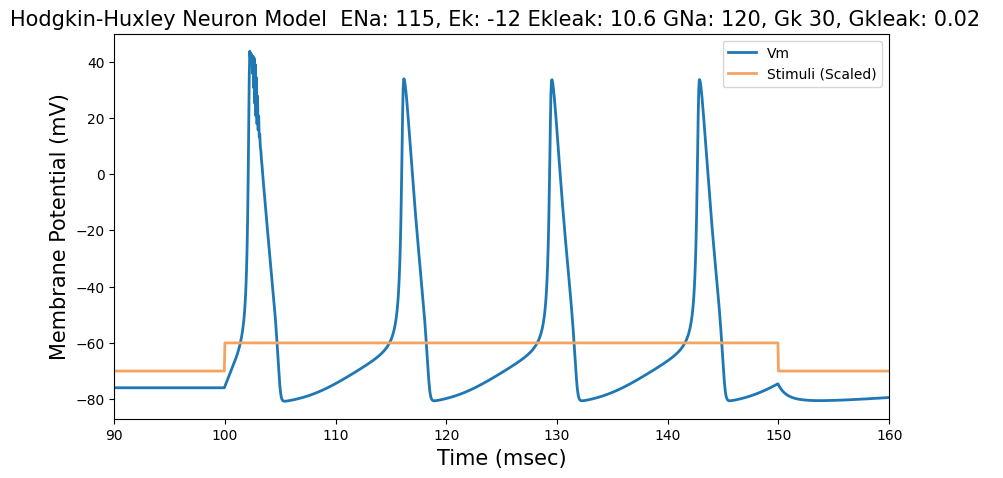

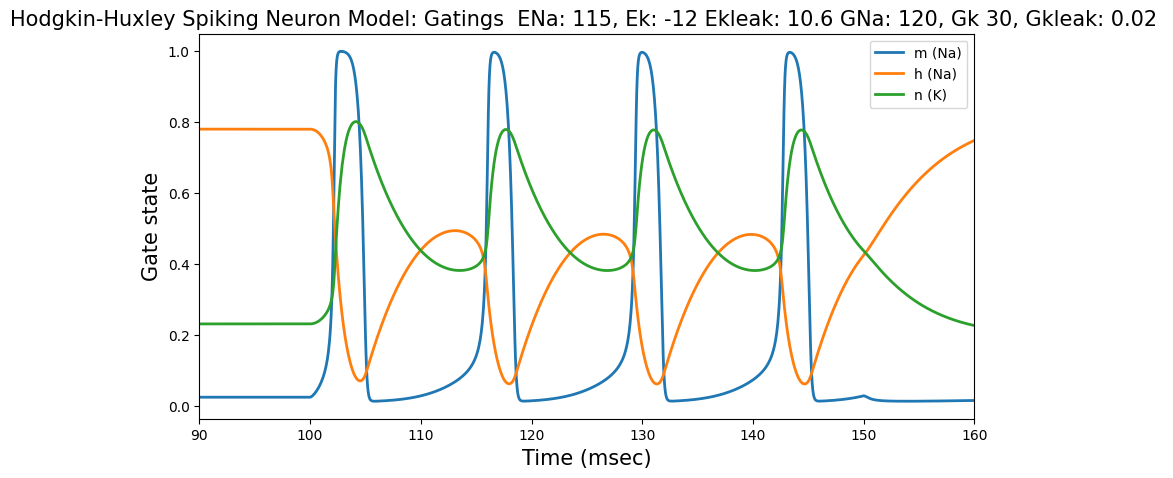

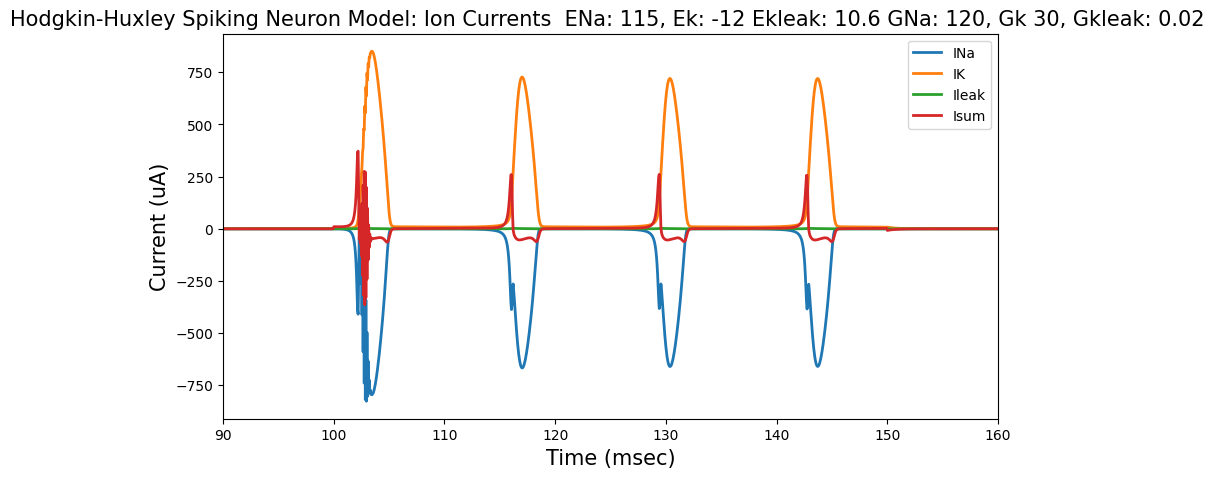

In [462]:
ENa, EK, EKleak = 115, -12, 10.6
GNa,GK,GKleak =  120, 30, 0.02

plot_expirements(ena=ENa ,ek=EK,ekleak = EKleak, gna=GNa ,gk=GK,gkleak = GKleak,)

#### Setup2  : GNa, GK, GKleak =  100, 12, 0.5

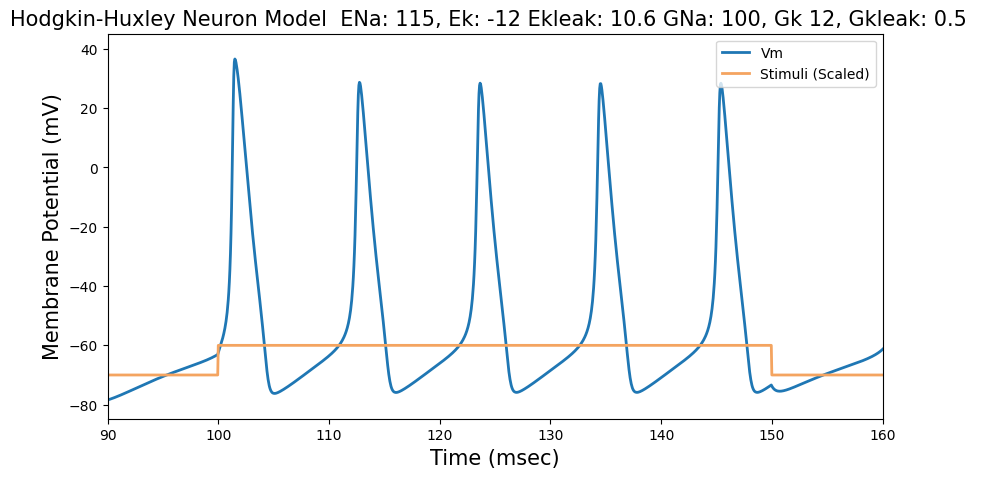

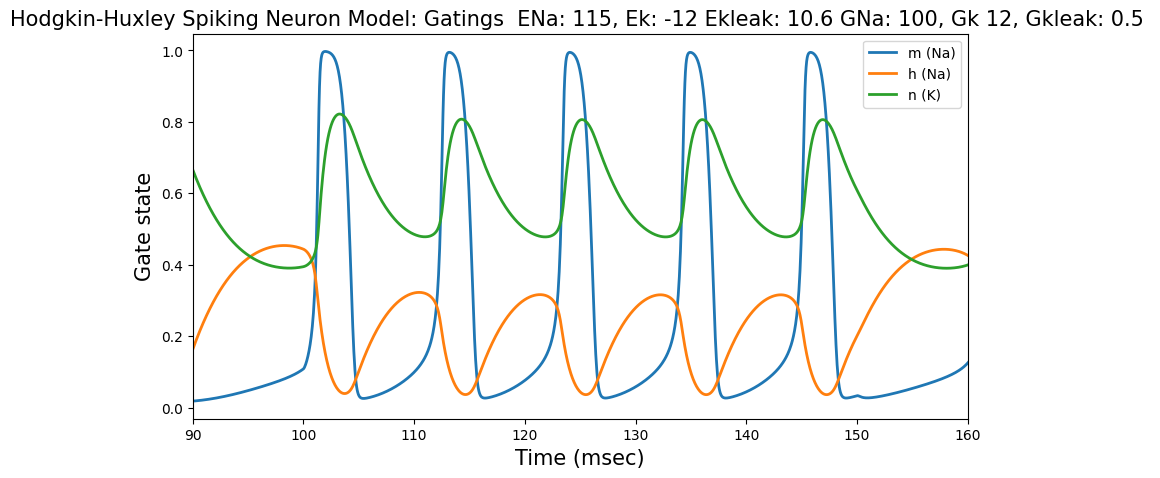

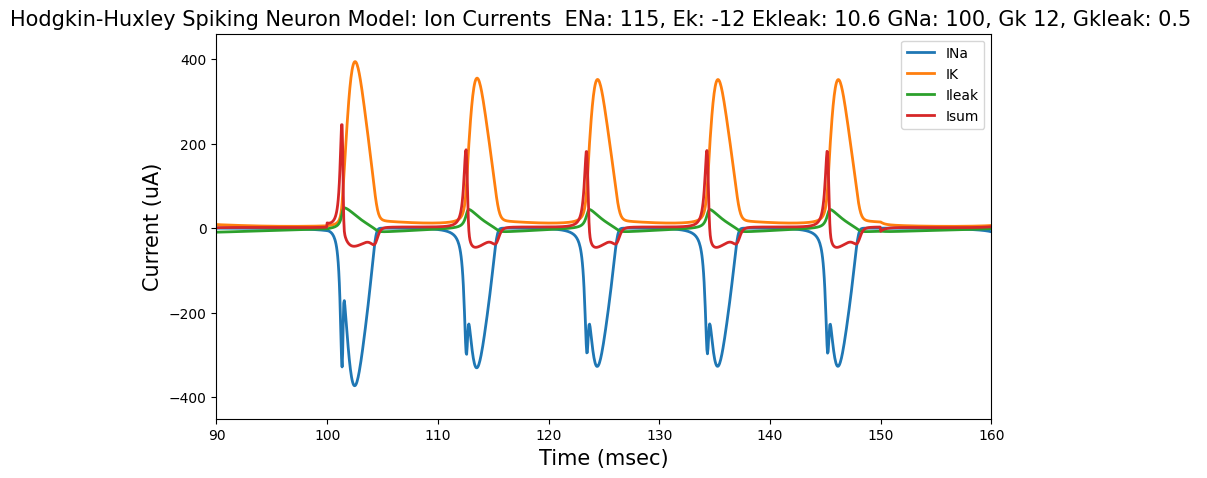

In [463]:
ENa, EK, EKleak = 115, -12, 10.6
GNa,GK,GKleak =  100, 12, 0.5

plot_expirements(ena=ENa ,ek=EK,ekleak = EKleak, gna=GNa ,gk=GK,gkleak = GKleak,)

#### Setup3  : GNa, GK, GKleak = 78, 25, 0.6

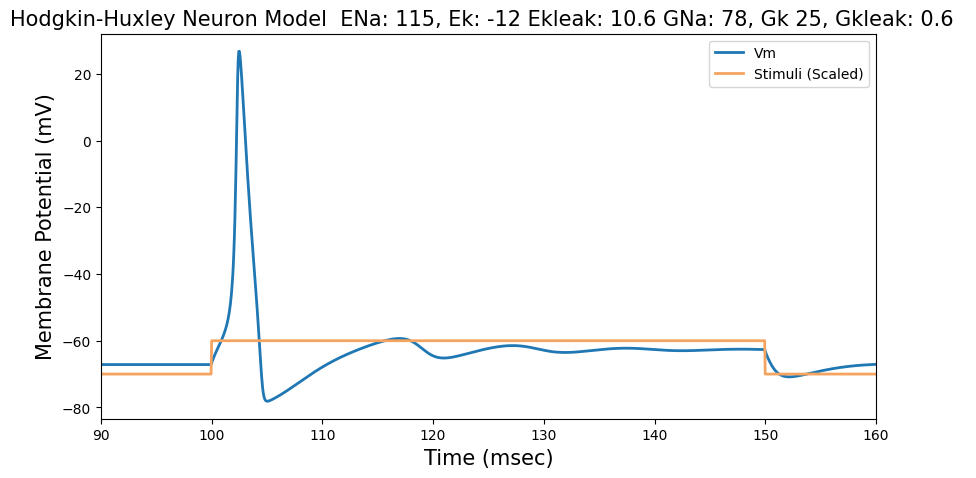

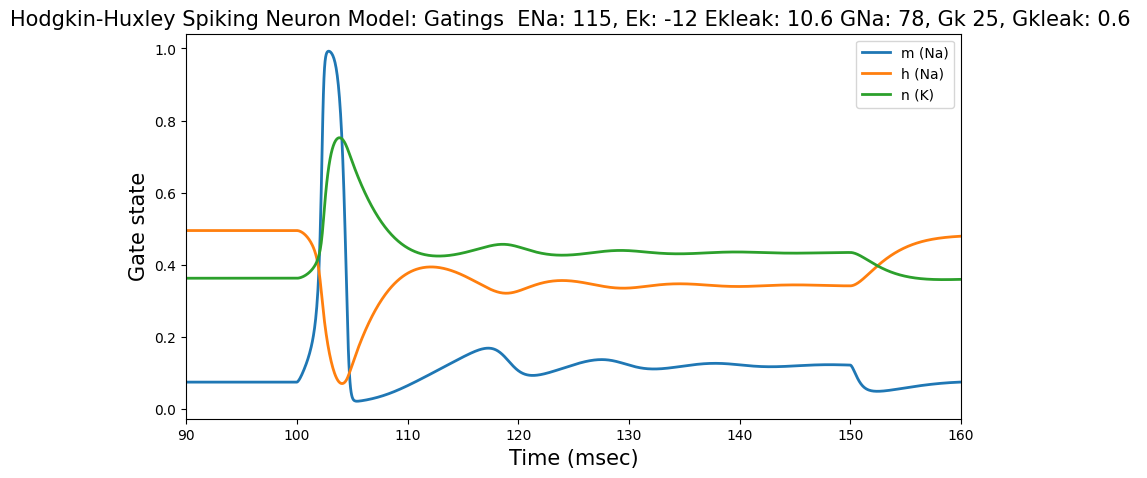

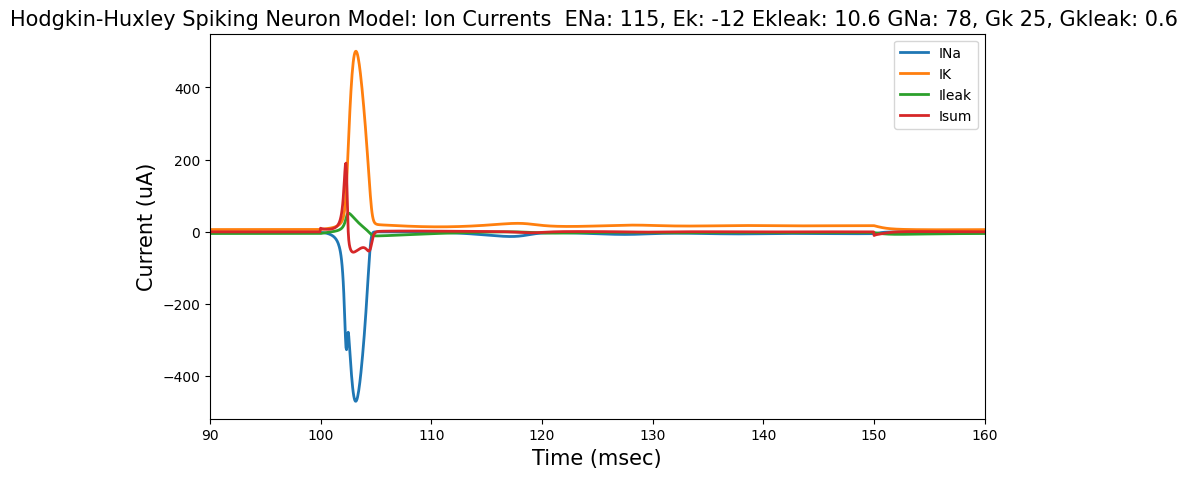

In [464]:
ENa, EK, EKleak = 115, -12, 10.6
GNa,GK,GKleak =  78, 25, 0.6

plot_expirements(ena=ENa ,ek=EK,ekleak = EKleak, gna=GNa ,gk=GK,gkleak = GKleak,)